<a href="https://colab.research.google.com/github/arkeodev/time-series/blob/main/Statistical_Time_Series_Analysis/6-Auto-Regressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoregressive Model (AR)

An autoregressive model is a type of statistical model used in time series analysis. It is called "autoregressive" because it uses the dependent relationship of a variable with itself over previous time periods. The basic idea is that past values in the time series can predict future values.

## Model Structure


The equation $ x_t = C + \phi x_{t-1} + \epsilon_t $ represents a simple AR(1) model, where:

- $ x_t $ This is the value of our time series at time $ t $.
- $ C $: A constant term that offsets the series. It can also be interpreted as the mean level of the series when all other influences are accounted for.
- **Coefficient ($ \phi $):** 
The coefficient $ \phi $ quantifies the strength and nature of the influence that the lagged term has on the current value. It is a numeric constant and a crucial parameter in the AR model. In a simple AR(1) model, we only consider one lag, but more complex AR models may include multiple lags (e.g., AR(2) would include $ x_{t-2} $).
      
- **Coefficient Range ( $ -1 \leq \phi \leq 1 $ ):** The range of the coefficient is between -1 and 1. This range is important for the model to be stationary:
   - If $ \phi = 1 $, the process has a unit root and is non-stationary, meaning it will continue to grow indefinitely and is not suitable for standard AR modeling.
   - If $ \phi $ is outside this range, the process is explosive, leading to values that diverge as time goes on, which is generally not realistic for most natural processes.
- $ x_{t-1} $: The value of the series at time $ t-1 $, the previous time period.
- $ \epsilon_t $: The error term at time $ t $, also known as the shock or innovation. It represents random new information that was not predictable from past values.

## How the AR Model Works


The model posits that the current period’s value is based on a combination of a constant term, a proportion of the immediately preceding value (or values, for higher-order models), and a random shock. The strength of the dependency on previous values is indicated by the size of the coefficient $ \phi $. If $ \phi $ is:
- Close to 1: The series has a strong positive relationship with its past value; the closer it gets to 1, the slower is the decay of the autocorrelation.
- Close to 0: There is little to no relationship with the past value.
- Negative: The series has an inverse relationship with its past value, leading to an oscillating pattern.

The autoregressive model is particularly useful when the analyst believes that the time series has a long memory, meaning that past values have a lingering effect on future values. The AR model is just one type of time series model, and it's often used in cases where the data shows a clear correlation over time lags. The model's simplicity makes it a useful starting point for time series forecasting.

## Higher Order Autoregressive Models - AR(2)

**Model Equation:**
The equation $ x_t = C + \phi_1 x_{t-1} + \phi_2 x_{t-2} + \epsilon_t $ extends the AR(1) model by including an additional lagged term:

- $ x_t $: The current value of the time series.
- $ C $: The constant term.
- $ \phi_1 $: The coefficient for the first lag (one period back).
- $ \phi_2 $: The coefficient for the second lag (two periods back).
- $ \epsilon_t $: The error term at time $ t $.

The inclusion of a second lagged term allows the AR(2) model to capture more complex patterns in the time series that depend on the last two periods, rather than just one.

**Increased Complexity:**
- **More Lags**: As the order of an AR model increases (more lagged terms), the model becomes capable of capturing more complex relationships in the data.
- **More Complicated**: With each additional lag, the model's complexity increases. This can make the model more challenging to estimate and interpret.
- **More Coefficients**: Each lag comes with its own coefficient, which needs to be estimated from the data. This increases the number of parameters in the model.

## Considerations for AR Models:

- The process of model selection typically involves testing whether each additional lagged term significantly improves the model's performance. This can be done through **hypothesis testing** (e.g., t-tests on the coefficients) and information criteria like **AIC** or **BIC**.

- It’s crucial to balance model complexity with predictive performance. More complex models (with more lags) are not always better if they do not provide a significant improvement in forecasting accuracy.

- Cross-validation and out-of-sample testing can help determine if the additional complexity is warranted by leading to better predictive performance on data not used to fit the model.

## Example of AR(1) Model

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# We will generate a simple AR(1) process with a known phi coefficient of 0.7 and a constant of 2.

np.random.seed(42)  # for reproducibility
n_samples = 100
sigma = 1  # standard deviation of noise

# Generating AR(1) series
errors = np.random.normal(0, sigma, n_samples)

alpha = 2  # constant C
phi = 0.7  # AR coefficient

data = [alpha / (1 - phi)]  # this will be our x_0 assuming mean level when phi=0

for t in range(1, n_samples):
    data.append(alpha + phi * data[t-1] + errors[t])

time_series = pd.Series(data)

# Fitting the AR(1) model
ar_model = AutoReg(time_series, lags=1, old_names=False)
ar_results = ar_model.fit()

# Display the summary of AR(1) model results
ar_summary = ar_results.summary()
ar_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -130.638
Method:               Conditional MLE   S.D. of innovations              0.905
Date:                Fri, 12 Apr 2024   AIC                            267.276
Time:                        22:13:08   BIC                            275.062
Sample:                             1   HQIC                           270.426
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0774      0.479      4.334      0.000       1.138       3.017
y.L1           0.6703      0.075      8.995      0.000       0.524       0.816
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4918           +0.0000j            1.4918            0.0000
-----------------------------------------------------------------------------
"""

The AR(1) model has been fitted to the synthetic time series data, and here is a summary of the results:

1. **Dependent Variable**: The variable we are predicting, denoted by `y`.
2. **No. Observations**: The number of observations in the dataset, which is 100.
3. **Model**: The type of model used, an autoregressive model of order 1 (AR(1)).
4. **Method**: The method used to estimate the model parameters, Conditional Maximum Likelihood Estimation (MLE).
5. **S.D. of innovations**: The standard deviation of the innovations (errors), estimated at 0.905. This indicates the average size of the errors made by the model when predicting the next value in the series.
6. **AIC/BIC/HQIC**: These are information criteria used to compare models with different numbers of parameters: Akaike Information Criterion, Bayesian Information Criterion, and Hannan-Quinn Information Criterion, respectively. Lower values are generally better.

Regarding the coefficients:
- **const**: The estimated constant term (C) is 2.0774 with a standard error of 0.479. The z-score is 4.334, and the p-value (P>|z|) is very close to 0, indicating that the constant term is statistically significant.
- **y.L1**: The estimated coefficient for the first lagged term (φ) is 0.6703 with a standard error of 0.075. The z-score is 8.995, which is far from zero, and again the p-value is extremely small, suggesting that the lagged term is highly significant.

In summary, the fitted AR(1) model suggests that there is a strong and significant relationship between the current value of the series and its immediate past value. The positive coefficient (0.6703) close to the true value we set (0.7) indicates that past values have a direct and quite substantial influence on future values. The model's parameters are both statistically significant, and the low standard deviation of the innovations suggests that the model fits the data reasonably well.

## Example of Higher Order Models

In [9]:
# Re-running the analysis to fit AR(2) up to AR(5) models and compare their log likelihood and p-values

# Start with AR(2) and go up to AR(5)
ar_orders = range(1, 6)
ar_results = {}
log_likelihoods = []
models_summary = {}

# Loop through each order, fit the model, and save the results
for order in ar_orders:
    model = AutoReg(time_series, lags=order, old_names=False)
    results = model.fit()
    ar_results[order] = results
    log_likelihoods.append(results.llf)
    models_summary[order] = results.summary()
    
print(f"Models summary results:\n {models_summary}\n")
print(f"Log Likelihoods:\n {log_likelihoods}\n")

# Check if each subsequent model has a better log likelihood
# And all coefficients are significant at the 5% level (p-value < 0.05)
better_models = {}
previous_llf = float('-inf')  # initialize with negative infinity
for order, result in ar_results.items():
    # A better model has a higher log likelihood and all p-values of coefficients < 0.05
    p_values = result.pvalues
    all_p_values_significant = np.all(p_values < 0.05)
    if result.llf > previous_llf and all_p_values_significant:
        better_models[order] = result
        previous_llf = result.llf

# The last entry in better_models is where the log likelihood starts to get worse
# Get summaries of the better models
better_models_summary = {order: results.summary() for order, results in better_models.items()}
last_better_order = max(better_models.keys()) if better_models else None

print(f"Best Model Summary:\n {better_models_summary}\n")


Models summary results:
 {1: <class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -130.638
Method:               Conditional MLE   S.D. of innovations              0.905
Date:                Fri, 12 Apr 2024   AIC                            267.276
Time:                        23:39:41   BIC                            275.062
Sample:                             1   HQIC                           270.426
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0774      0.479      4.334      0.000       1.138       3.017
y.L1           0.6703      0.075      8.995      0.000

The output summarizes the results of fitting Autoregressive (AR) models of different orders (AR(1) through AR(5)) to a time series dataset. Let's interpret and compare these models:

**Model Comparison:**

- **Log Likelihood**: Increases (becomes less negative) as we move from AR(1) to AR(5), suggesting an improving fit to the data with each additional lag.
- **S.D. of innovations**: Remains relatively constant, suggesting the models' residuals have a similar spread.
- **AIC/BIC/HQIC**: Typically, we want lower AIC/BIC values, which trade off model fit against complexity. AIC drops from AR(1) to AR(5), suggesting that despite the increased complexity, the models are improving.
  
For each AR model:

1. **AR(1)**: Has a significant lag 1 coefficient (0.6703).
2. **AR(2)**: Introduces a lag 2 term, but it's not significant (p-value: 0.920).
3. **AR(3)**: Adds a lag 3 term, which is also not significant (p-values for lag 2 and 3 are high).
4. **AR(4)**: Includes lag 4; none of the added lags (2 to 4) are significant.
5. **AR(5)**: The model includes up to lag 5, with no significant improvement in coefficients for lags 2-4, but introduces a fifth lag with a p-value (0.277) that is not significant at the 0.05 level.

**Best Model Selection:**

Based on the Log Likelihood, the AR(5) model has the best (highest) value, suggesting it fits the data better than the others. However, considering model parsimony and significance of coefficients, AR(5) seems not be the best choice due to the insignificant lag coefficients.

Here's how to interpret the situation:
- Although higher-order models have higher log likelihoods, the significance of their additional coefficients does not justify their complexity.
- From the p-values provided, AR(1) has a significant coefficient for lag 1, while AR(2) and higher models have insignificant coefficients for higher-order lags.
- In practice, we would typically choose the model with significant coefficients and the lowest AIC/BIC. However, all AIC and BIC values seem to decrease as we increase the model order, even when new lags are not significant.

Given this, the **AR(1) model may be considered the best choice** because it is simpler and all included terms are significant. Adding more lags does not seem to provide additional benefits in terms of significance of coefficients, even though the log likelihood increases slightly, suggesting that these additional lags may be capturing noise rather than true signals.

It's important to remember that while the log likelihood is useful for model comparison, it should not be the sole criterion for model selection. The significance of the coefficients and information criteria should also play a central role in this decision. In this case, **AR(1) seems to be the most parsimonious and justified model** based on the provided output.

## Check Stationarity

ADF Statistic (Adjusted Data): -4.378481761536806
p-value (Adjusted Data): 0.0003239710306015374
Critical Value (1%, Data): -3.498198082189098
Critical Value (5%, Data): -2.891208211860468
Critical Value (10%, Data): -2.5825959973472097


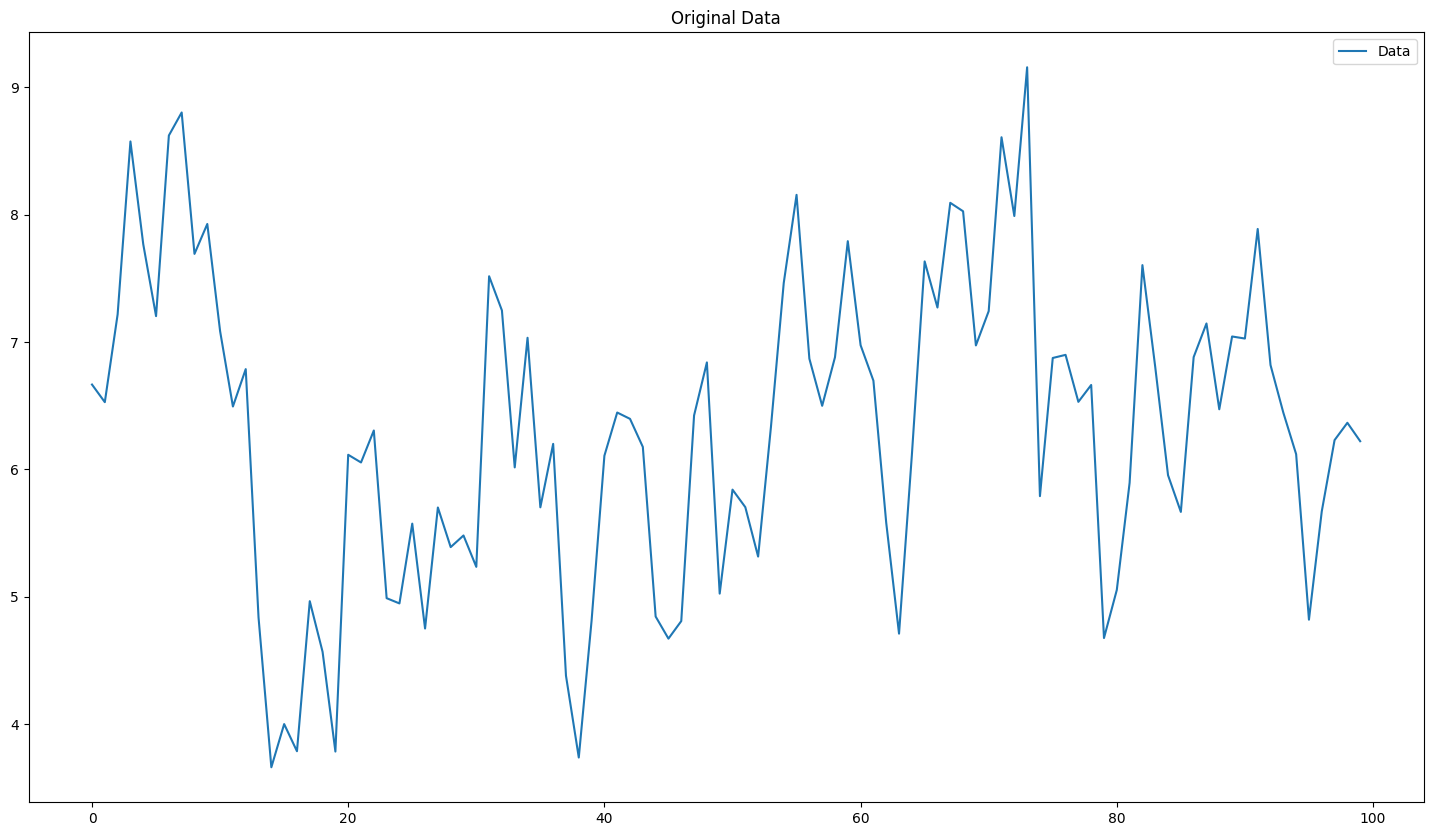

In [11]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np

# Perform Augmented Dickey-Fuller test on the seasonally and trend adjusted data
adf_result = adfuller(time_series)

# Print ADF test results for the data
print(f'ADF Statistic (Adjusted Data): {adf_result[0]}')
print(f'p-value (Adjusted Data): {adf_result[1]}')
for key, value in adf_result[4].items():
    print(f'Critical Value ({key}, Data): {value}')

# Plot original, seasonally adjusted, and trend adjusted data
plt.figure(figsize=(18, 10))
plt.plot(time_series, label='Data')
plt.title('Original Data')
plt.legend()
plt.show()

According tothe values below, the data seems stationarity. Then we don't need any transformations to make it stationary.

ADF Statistic (Adjusted Data): -4.378481761536806

p-value (Adjusted Data): 0.0003239710306015374

Critical Value (1%, Data): -3.498198082189098

Critical Value (5%, Data): -2.891208211860468

Critical Value (10%, Data): -2.5825959973472097


## ACF and PACF Graphs

Now let's check the ACF and PACF results to confirm the model output.

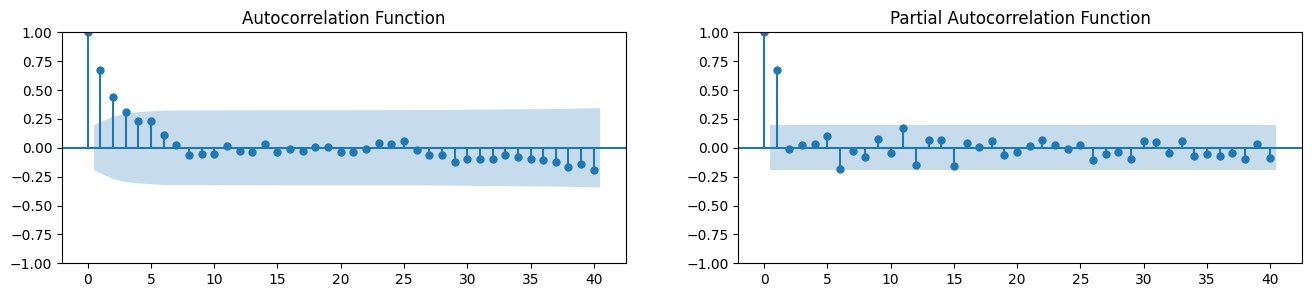

In [12]:
# Drawing the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for the time series data

fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)

# Plot the ACF
sm.graphics.tsa.plot_acf(time_series, lags=40, alpha=0.05, ax=axes[0])
axes[0].set_title('Autocorrelation Function')

# Plot the PACF
sm.graphics.tsa.plot_pacf(time_series, lags=40, alpha=0.05, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function')

plt.show()

The above images shows the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for a time series. Here's how to interpret these plots:

**ACF Plot Interpretation**:
- The ACF shows a gradual decay in correlation as the lags increase. This suggests that the time series data is likely an AR process because the autocorrelations are slowly diminishing over time rather than cutting off sharply.

**PACF Plot Interpretation**:
- The PACF shows a significant spike at lag 1, which falls outside the confidence interval (blue shaded area). This indicates a strong partial autocorrelation at lag 1.
- Beyond lag 1, the partial autocorrelations are within the confidence interval, which suggests that they are not significantly different from zero.

Combining the insights from both the ACF and PACF plots, the following conclusions can be made:

- The significant spike in the PACF at lag 1 confirms the AR(1) process, as there is only one significant partial autocorrelation.
- The ACF's pattern of slow decay supports the existence of an autoregressive component in the time series.
- There is no clear evidence from the PACF to suggest the presence of additional AR terms beyond the first lag, aligning with the earlier conclusion that an AR(1) model may be the most appropriate for this data.

These plots are consistent with the earlier statistical tests that indicated an AR(1) model would be a good fit for the data, providing further confirmation of that model choice.

## Normalisation in Time Series Analysys

Normalization in time series analysis is crucial when dealing with variables that are on different scales or when the data range is wide. This is especially important when using methods that are sensitive to the scale of data, such as machine learning algorithms. Normalization helps to:
- Improve the convergence of training algorithms.
- Ensure that features contribute equally to the analysis.
- Make the results more stable and the interpretation easier.

In the context of financial time series, "returns" are often analyzed instead of "values" because returns are more stationary and usually have a constant variance, unlike raw pricing data which can be non-stationary and exhibit varying volatility.

To demonstrate normalization and its effects, I will:
1. Normalize the time series values using a common method (such as the Min-Max scaling).
2. Calculate the returns of the time series and then normalize these returns.
3. Perform the Augmented Dickey-Fuller (ADF) test on the original, normalized values, and normalized returns to test for stationarity.

In finance, "returns" refer to the gain or loss on an investment over a specified period, expressed as a percentage of the investment's initial cost. They are a measure of the investment’s profitability.

There are different ways to calculate returns, but one of the most common methods is to use the simple price return, which is determined by the change in price of the asset between two time points. Here is the formula for the simple return from time $ t-1 $ to time $ t $:

$$
\text{Return}_t = \left( \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}} \right) \times 100
$$

This formula calculates the percentage change in the price of the asset. For instance, if the price of a stock increases from $100 to $105, the return is:

$$
\text{Return} = \left( \frac{105 - 100}{100} \right) \times 100 = 5\%
$$

Returns are a fundamental concept in financial time series analysis because they are typically more stationary than prices. Price data often exhibit trends and non-constant variance (volatility), which makes them non-stationary and challenging to model. On the other hand, returns tend to fluctuate around a mean of zero and have a constant variance, which makes them better suited for modeling and forecasting.

In time series analysis, especially when dealing with financial data, using returns instead of raw prices is common practice for these reasons. It simplifies the modeling process and allows for more accurate predictions and risk assessments.

In [13]:
from statsmodels.tsa.stattools import adfuller

# Normalizing the time series values using Min-Max scaling
values = np.array(time_series)
values_min_max_scaled = (values - np.min(values)) / (np.max(values) - np.min(values))

# Calculating the returns of the time series (percentage change)
returns = np.diff(values) / values[:-1]

# Normalizing the returns using Min-Max scaling
returns_min_max_scaled = (returns - np.min(returns)) / (np.max(returns) - np.min(returns))

# Performing the ADF test on the original values
adf_result_original = adfuller(values)

# Performing the ADF test on the normalized values
adf_result_normalized_values = adfuller(values_min_max_scaled)

# Since we cannot normalize the first value (as diff would result in NaN), we start from the second value
adf_result_normalized_returns = adfuller(returns_min_max_scaled)

print(f"ADS Results of the Original Values: {adf_result_original}")
print(f"ADS Results of the Normalised Values: {adf_result_normalized_values}")
print(f"ADS Results of the Normalised Returns: {adf_result_normalized_returns}")

ADS Results of the Original Values: (-4.378481761536806, 0.0003239710306015374, 0, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, 235.06744355691455)
ADS Results of the Normalised Values: (-4.378481761536809, 0.00032397103060153307, 0, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, -61.42276330143886)
ADS Results of the Normalised Returns: (-3.951290894273991, 0.001688178605086198, 11, 87, {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}, -62.34881753521344)


The Augmented Dickey-Fuller (ADF) test results give us valuable information about the time series data and its transformations:

**ADF Results of the Original Values**:
- Test Statistic: -4.3785
- p-value: 0.00032
- Number of Lags Used: 0
- Number of Observations: 99
- Critical Values: {'1%': -3.4982, '5%': -2.8912, '10%': -2.5826}
- Maximized Information Criterion (usually AIC): 235.0674

The test statistic is smaller than the 1%, 5%, and 10% critical values, and the p-value is significantly less than 0.05. This suggests that we can reject the null hypothesis of a unit root, indicating that the original series is stationary.

**ADF Results of the Normalized Values**:
- Test Statistic: -4.3785
- p-value: 0.00032
- Number of Lags Used: 0
- Number of Observations: 99
- Critical Values: {'1%': -3.4982, '5%': -2.8912, '10%': -2.5826}
- Maximized Information Criterion (usually AIC): -61.4228

The normalized values have the same test statistic and p-value as the original values. This confirms that normalization, which is a linear transformation, does not affect the stationarity property of the time series. The series remains stationary after normalization.

**ADF Results of the Normalized Returns**:
- Test Statistic: -3.9513
- p-value: 0.00169
- Number of Lags Used: 11
- Number of Observations: 87
- Critical Values: {'1%': -3.5079, '5%': -2.8954, '10%': -2.5848}
- Maximized Information Criterion (usually AIC): -62.3488

The test statistic for the normalized returns is also smaller than the critical values, and the p-value is below 0.05, suggesting that the returns are stationary as well. However, the fact that 11 lags are used may indicate some complexity in the series dynamics.

**Interpretation**:

- **Original and Normalized Values**: Both are stationary, which is somewhat unusual for raw financial time series data, as they typically have a unit root and show non-stationary behavior unless they have been detrended or transformed in some way prior to the test.

- **Normalized Returns**: These are also stationary. This is more in line with typical financial time series data, where returns are often considered stationary. However, the number of lags is quite high, which could be an indication of a need to account for additional factors or seasonality in the returns series.

- **Stationarity**: The stationarity of both the original values and the returns may suggest that the data does not have a clear trend or seasonal effects and that the variance is relatively stable.

- **Normalization Effect**: As shown, normalization doesn’t change the stationarity of the series. It simply rescales the data, which can be essential when inputs to a model need to be on a similar scale.

## Residuals

Residuals in time series analysis are the differences between observed values and the values predicted by a model. Analyzing residuals is crucial for several reasons:

1. **Model Diagnostics**: Residual analysis helps in diagnosing the adequacy of a model. If a model is appropriate for the data, the residuals should not exhibit any identifiable patterns when plotted over time.

2. **White Noise**: Ideally, residuals should resemble white noise, meaning they are independently and identically distributed random variables with a mean of zero and a constant variance. They should also not be correlated with each other (no autocorrelation).

3. **Goodness of Fit**: If residuals do not display white noise characteristics, it suggests that the model may not be capturing some aspect of the data's structure, and further model refinement or a different modeling approach may be necessary.

4. **Assumptions**: Many time series models assume that the residuals are normally distributed white noise. Violations of this assumption can lead to inefficiencies and inaccuracies in parameter estimation and forecasting.

To analyze the residuals of the time series model we discussed earlier (AR(1) model), we can:

- Plot the residuals over time.
- Perform an ADF test on the residuals to check for stationarity.
- Generate an ACF plot of the residuals to look for autocorrelation.



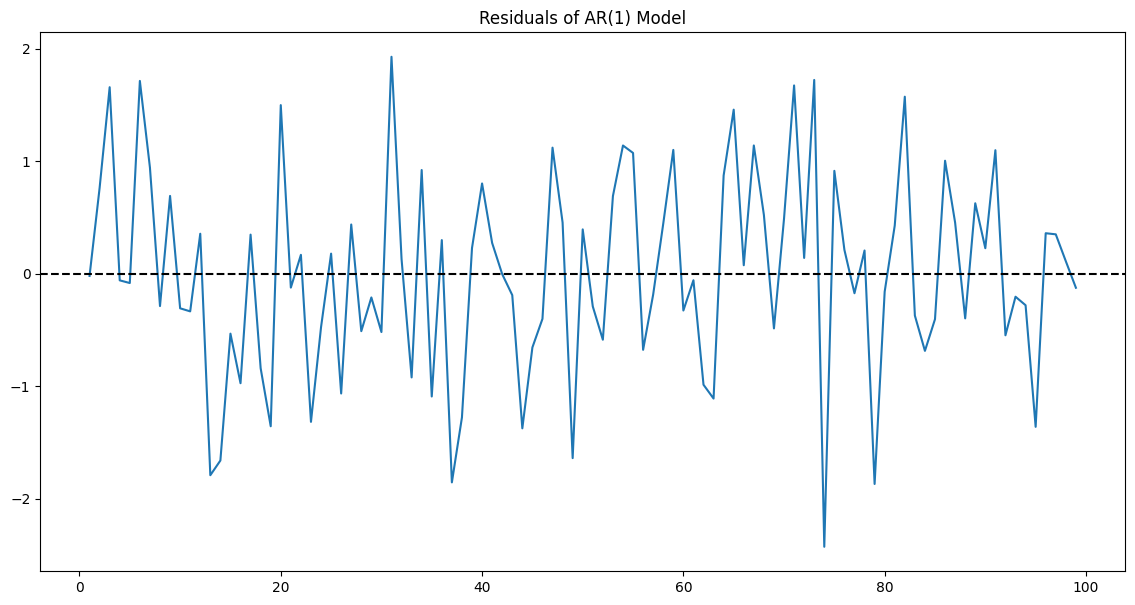

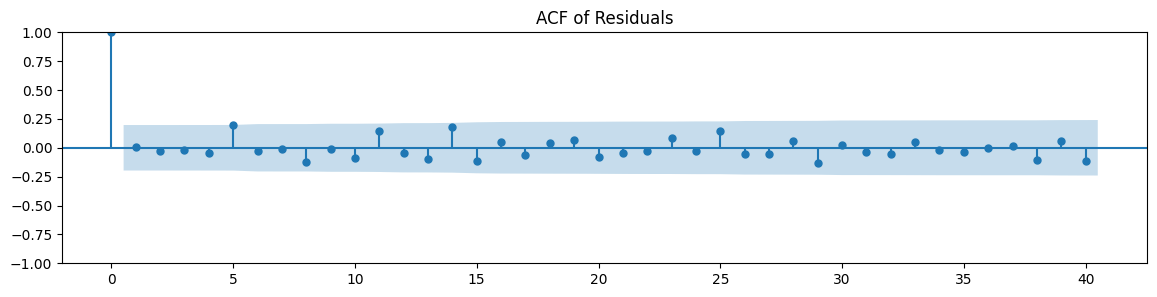

((-9.730060891391023,
  9.054606164758432e-17,
  0,
  98,
  {'1%': -3.4989097606014496,
   '5%': -2.891516256916761,
   '10%': -2.5827604414827157},
  230.03447647260694),
 None)

In [14]:
# Since we previously fitted an AR(1) model, we will use those results to get the residuals
residuals = ar_results[1].resid

# Plotting the residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals)
plt.title('Residuals of AR(1) Model')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

# Performing the ADF test on the residuals
adf_result_residuals = adfuller(residuals)

# Plotting the ACF of the residuals
fig, ax = plt.subplots(1, figsize=(14, 3), dpi=100)
sm.graphics.tsa.plot_acf(residuals, lags=40, alpha=0.05, ax=ax)
ax.set_title('ACF of Residuals')

(adf_result_residuals, plt.show())

Based on the visuals and the Augmented Dickey-Fuller (ADF) test results, here’s an interpretation regarding the residuals of the AR(1) time series model:

**Residuals Over Time**:
The plot of the residuals over time does not display any obvious pattern or systematic structure, which is a good indication that the model has captured the time series' behavior well. The residuals appear to fluctuate randomly around the zero line without any trends, cycles, or seasonal effects, which suggests that they might be white noise.

**ACF of Residuals**:
The ACF plot shows that all autocorrelations for the residuals are within the confidence bounds, which means there's no significant autocorrelation at any lag. This is what we would expect if the residuals are white noise because white noise should not have any predictable structure or relationship at different lags.

**ADF Test on Residuals**:
The ADF test results for the residuals show:
- Test Statistic: -9.7306, which is more negative than the 1%, 5%, and 10% critical values of -3.4989, -2.8915, and -2.5827 respectively.
- p-value: approximately 0, which is much less than the conventional threshold of 0.05.
- Used Lag: 0
- Number of Observations: 98

Given the highly negative test statistic and the very low p-value, we can reject the null hypothesis of a unit root, meaning the residuals are stationary.

**Interpretation of the Residuals Analysis**:

1. **White Noise**: The residuals of the AR(1) model seem to be white noise since they are stationary, have no autocorrelation, and are randomly distributed around zero without any pattern.

2. **Model Efficacy**: The behavior of the residuals suggests that the AR(1) model is well-specified for the data. This is because the residuals do not retain any predictable structure that could be further modeled.

3. **Forecast Reliability**: Since the residuals show no significant patterns and are effectively white noise, it implies that the model’s forecasts are reliable, and there is no further autocorrelated structure in the time series that the model has failed to capture.

4. **Future Modeling**: The lack of structure in the residuals means that there is no immediate indication that the time series model needs to be expanded with additional lags or that a different modeling approach is required.

Overall, the analysis of the residuals supports the conclusion that the AR(1) model is capturing the underlying process of the time series well, and the residuals can be considered white noise, which is an indication of a successful time series model.